# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_compare(ys, tau, x_scale=1, y_scale=1, figsize=(8, 5)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    for y in ys:
        means = np.cumsum(y*y_scale, dtype=np.float)
        means[tau:] = means[tau:] - means[:-tau]
        means = means[tau-1:] / tau
        x = np.arange(means.size) / x_scale
        ax.plot(x, means)
    ax.set_xlabel("Number of episodes, "+r"$10^3$", fontsize=18)
    ax.set_ylabel("Reward", fontsize=18)
    
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(18)
    for (i, spine) in enumerate(plt.gca().spines.values()):
        if i%2 != 0: spine.set_visible(False)    
    ax.grid()

def plot_means_and_stdevs(y, tau, x_scale=1, y_scale=1, figsize=(8, 5), 
                          color='dodgerblue', save=False):
    
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    y = np.array(y) * y_scale

    means = np.cumsum(y, dtype=np.float)
    stdevs = np.cumsum(np.square(y), dtype=np.float)
    
    means[tau:] = means[tau:] - means[:-tau]
    means = means[tau-1:] / tau
    
    stdevs[tau:] = stdevs[tau:] - stdevs[:-tau]
    stdevs = stdevs[tau-1:] / tau - np.square(means)
    stdevs = np.sqrt(stdevs)
    
    lower = means - stdevs
    upper = means + stdevs
    
    x = np.arange(means.size) / x_scale
    
    ax.plot(x, means, color=color)
    ax.fill_between(x, lower, means, alpha=0.2, where=lower <= means, facecolor=color)
    ax.fill_between(x, upper, means, alpha=0.2, where=upper >= means, facecolor=color)
    
    ax.set_xlabel("Number of episodes, "+r"$10^3$", fontsize=18)
    ax.set_ylabel("Reward", fontsize=18)
    
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(18)
    for (i, spine) in enumerate(plt.gca().spines.values()):
        if i%2 != 0: spine.set_visible(False)    
    ax.grid()
    
    if save:
        fig.savefig('results/prosthetics.png', dpi=300, bbox_inches='tight')
        
def plot_histograms(r, agents=[0], num_episodes=50, figsize=(8, 5)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    for i, a in enumerate(agents):
        indices = np.where(r[:,0]==a)
        ax.hist(r[:,2][indices][-num_episodes:], bins=16, edgecolor='black', range=[-5, 5], 
                alpha=0.7, linewidth=1.5, label="Agent "+str(a))
        print ("Agent " + str(a) + " average reward:", np.mean(r[:,2][indices][-num_episodes:]))
        ax.set
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(18)
    for (i, spine) in enumerate(plt.gca().spines.values()):
        if i%2 != 0: spine.set_visible(False)
    ax.legend()

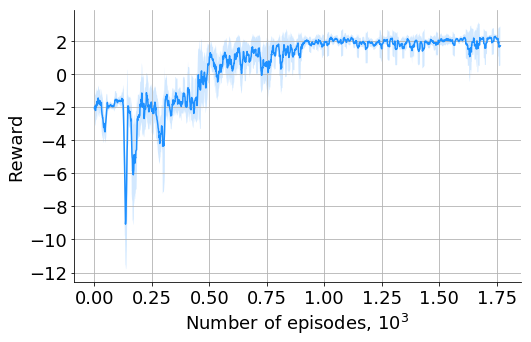

In [3]:
r = np.loadtxt('experiments/lunar_lander/logs/ddpg/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

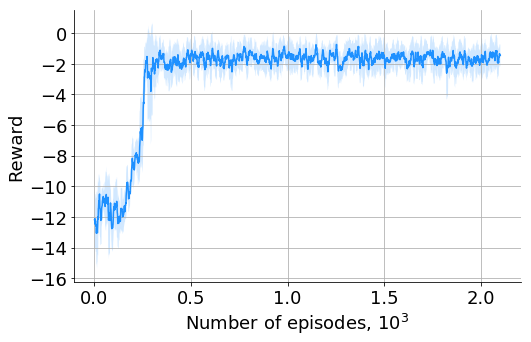

In [22]:
r = np.loadtxt('experiments/pendulum/results/test/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

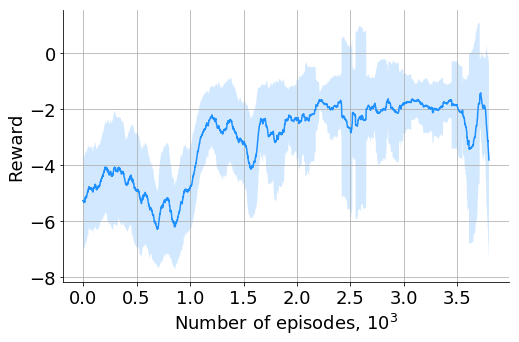

In [55]:
r = np.loadtxt('experiments/lunar_lander/results/qqtt/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=100, x_scale=1000, y_scale=1, save=False)

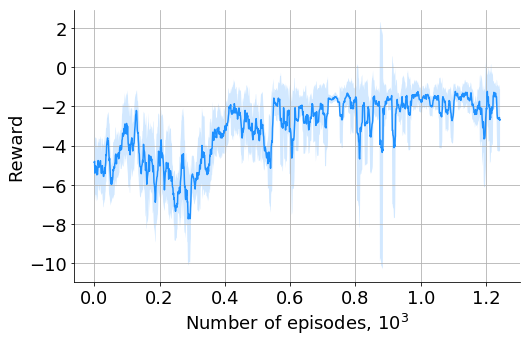

In [54]:
r = np.loadtxt('experiments/lunar_lander/results/qqtt/rewards-test.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

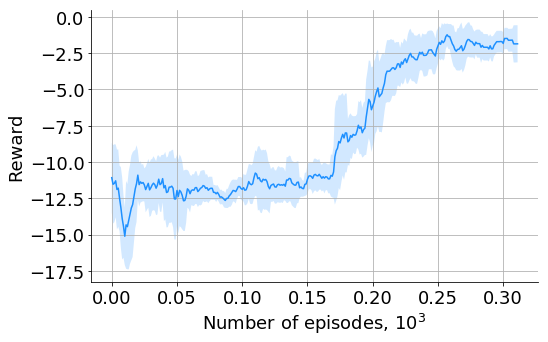

In [9]:
r = np.loadtxt('experiments/pendulum/results/test/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

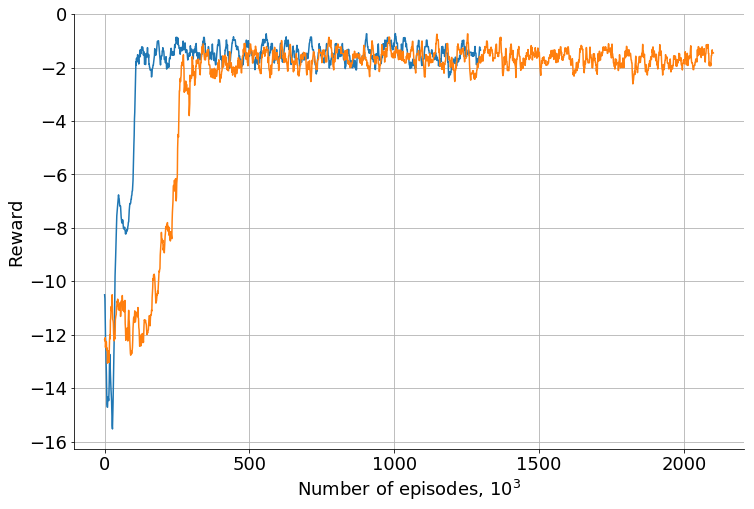

In [18]:
r_ddpg = np.loadtxt('experiments/pendulum/results/ddpg/rewards-train.txt')[:,2]
r_qqtt = np.loadtxt('experiments/pendulum/results/test/rewards-train.txt')[:,2]
plot_compare([r_ddpg, r_qqtt], figsize=(12, 8), tau=10)